# __A study on the most offensive teams in Europe__

In [302]:
__author__ = 'Oskar Martin'
__email__ = 'oscar.martink1@gmail.com'
__website__ = 'oskarmk.github.io'

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### __1. Read Files for the different countries__

In [60]:
# Each .read_html function returns a list of datatable object.
data_es = pd.read_html('https://fbref.com/en/comps/12/La-Liga-Stats', header=1)
data_en = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats', header=1)
data_fr = pd.read_html('https://fbref.com/en/comps/13/Ligue-1-Stats', header=1)
data_ge = pd.read_html('https://fbref.com/en/comps/20/Bundesliga-Stats', header=1)
data_it = pd.read_html('https://fbref.com/en/comps/11/Serie-A-Stats', header=1)

In [88]:
# Create a dict with the data from all country and the representign letters.
list_data = {'es': data_es, 'en': data_en, 'fr': data_fr, 'ge':data_ge, 'it':data_it}

In [303]:
# Create a function to get the combined data of the five leagues for the desired table

def get_df(list_dfs, index):
    """Generates a dataframe with the desired dataframe containing the information of the
    defined index for all teams in the big five leagues
    
    Parameters
    ---------
    list_dfs: List --> list of data in format List(dfs) as extracted with pd.read_html
    index: int --> integer defining the location of the desired Dataframe in the list(dfs)   
    """
    
    list_dfs = []
    for name, df in list_data.items():
        df_country = df[index] # Index into the ith element
        df_country['country'] = name # Add country letters to the 
        list_dfs.append(df_country) # Append country dataframe to list with all dataframes
    
    full = pd.concat(list_dfs) # concatenate all country dataframes and name them like desired
    return full # return dataframe with the desired name
    
    

### __2. Shooting Data__

#### __2.1 Create 'shooting' df with the data from the five big leagues__

In [153]:
shooting = get_df(list_data, 8)

In [122]:
# test that it worked trying out different indexes
shooting.sample(n=5)

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,country
2,Atlético Madrid,24,21.0,29,295,105,35.6,14.05,5.00,0.10,...,17.4,5,0,0,30.8,30.8,0.11,-1.8,-1.8,es
64,Eint Frankfurt,26,21.0,41,237,86,36.3,11.29,4.10,0.16,...,17.6,11,4,4,31.7,28.5,0.12,9.3,8.5,ge
17,Valencia,26,21.0,26,278,84,30.2,13.24,4.00,0.08,...,17.7,13,4,6,27.9,23.2,0.08,-1.9,-1.2,es
32,Manchester City,21,24.0,59,394,134,34.0,16.42,5.58,0.14,...,16.7,11,5,5,50.5,46.6,0.12,8.5,7.4,en
68,Köln,26,21.0,29,245,77,31.4,11.67,3.67,0.11,...,16.5,4,2,2,28.6,27.0,0.11,0.4,0.0,ge


#### __2.2 Explore shooting__

##### __2.2.0 Expected Goals__

In [296]:
shooting.columns

Index(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG', 'country', 'Gls/90'],
      dtype='object')

In [297]:
shooting['xG/90'] = shooting['xG'] / shooting['# Pl']

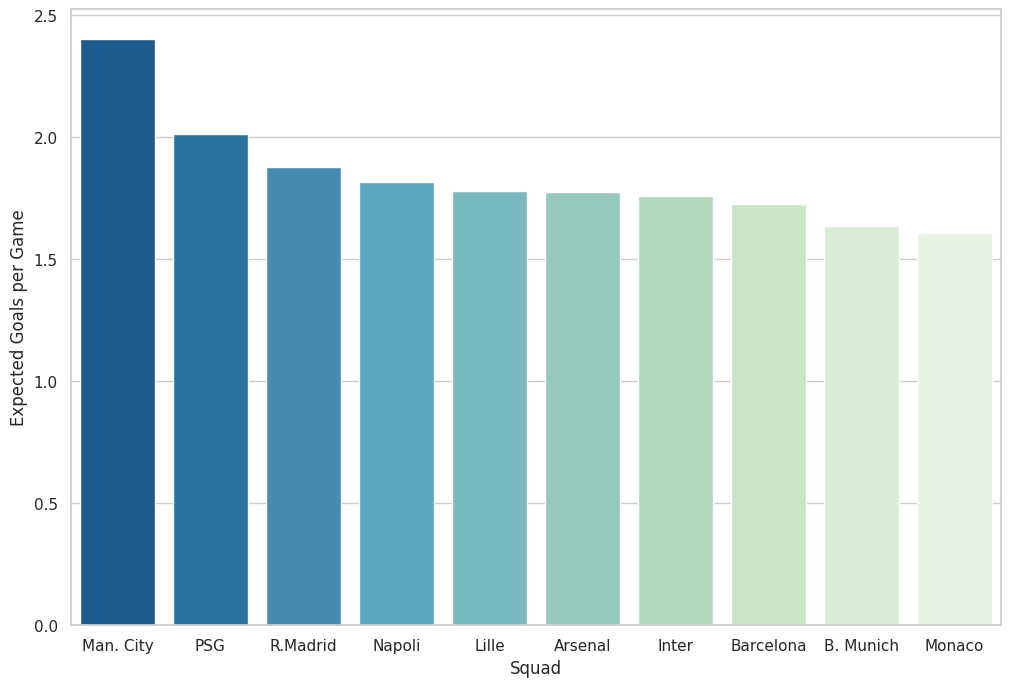

In [298]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=shooting.sort_values('xG/90', ascending=False).head(10), x='Squad', y='xG/90', palette='GnBu_r')
plt.xticks(rotation=0)
plt.xlabel('Squad')
plt.ylabel('Expected Goals per Game')

plt.savefig('pics/xgoals.png')

In [182]:
# Let's see where Barcelona Ranks
sorted_df = shooting.sort_values('xG', ascending=False).reset_index(drop=True)
barcelona_position = sorted_df[sorted_df['Squad'] == 'Barcelona'].index[0] + 1
print(f'Barcelona ranks: {barcelona_position + 1}')

Barcelona ranks: 8


<AxesSubplot: xlabel='country', ylabel='xG'>

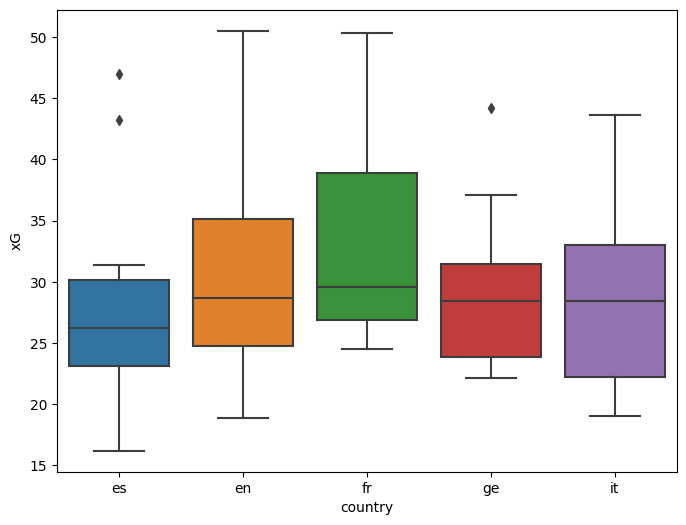

In [186]:
plt.figure(figsize=(8,6))
sns.boxplot(data=shooting, x='country', y='xG')

##### __2.2.1 Goals per game__

In [184]:
# Let's add a column for goals/ match
shooting['Gls/90'] = shooting['Gls'] / shooting['# Pl']

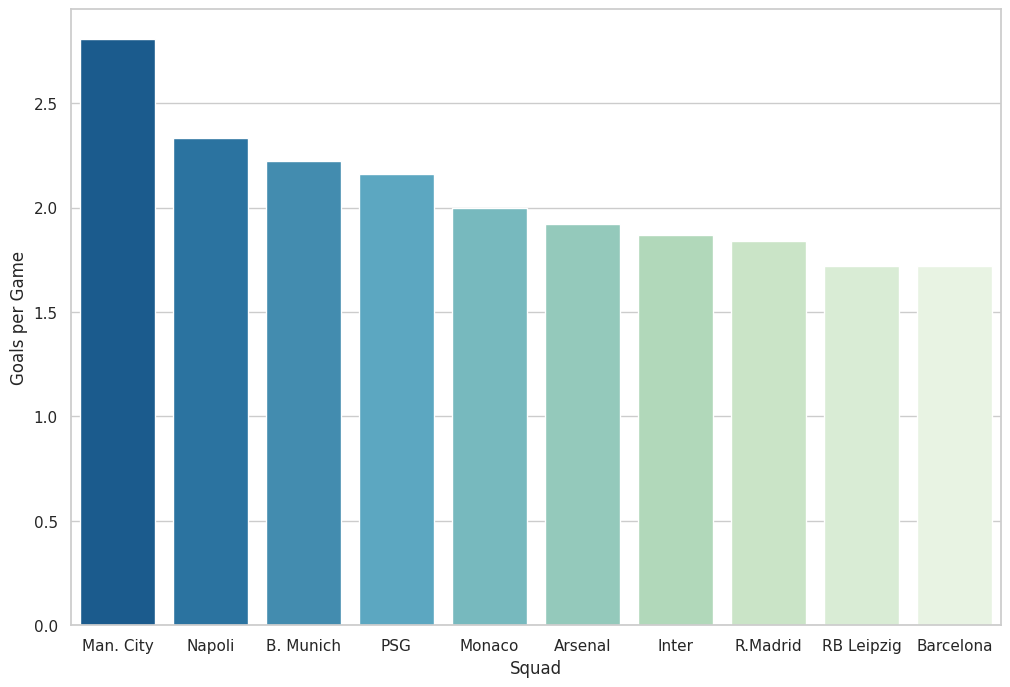

In [230]:
shooting['Squad'] = shooting['Squad'].replace({'Bayern Munich': 'B. Munich',
                                               'Manchester City': 'Man. City',
                                               'Paris S-G': 'PSG',
                                               'Real Madrid': 'R.Madrid'})

sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=shooting.sort_values('Gls/90', ascending=False).head(10), x='Squad', y='Gls/90', palette='GnBu_r')
plt.xticks(rotation=0)
plt.xlabel('Squad')
plt.ylabel('Goals per Game')

plt.savefig('pics/culoo.png')

In [185]:
# Let's see where Barcelona Ranks
sorted_df = shooting.sort_values('Gls/90', ascending=False).reset_index(drop=True)
barcelona_position = sorted_df[sorted_df['Squad'] == 'Barcelona'].index[0] + 1
print(f'Barcelona ranks: {barcelona_position + 1}')

Barcelona ranks: 11


<AxesSubplot: xlabel='country', ylabel='Gls/90'>

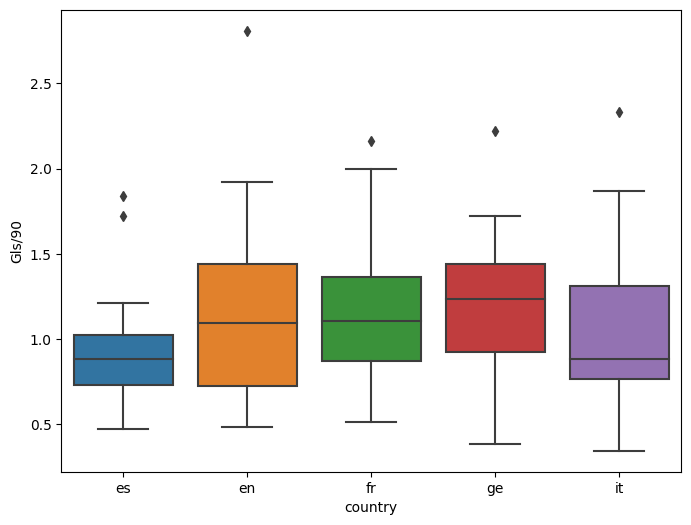

In [99]:
plt.figure(figsize=(8,6))
sns.boxplot(data=shooting, x='country', y='Gls/90')

##### __2.2.2 Shots per game__

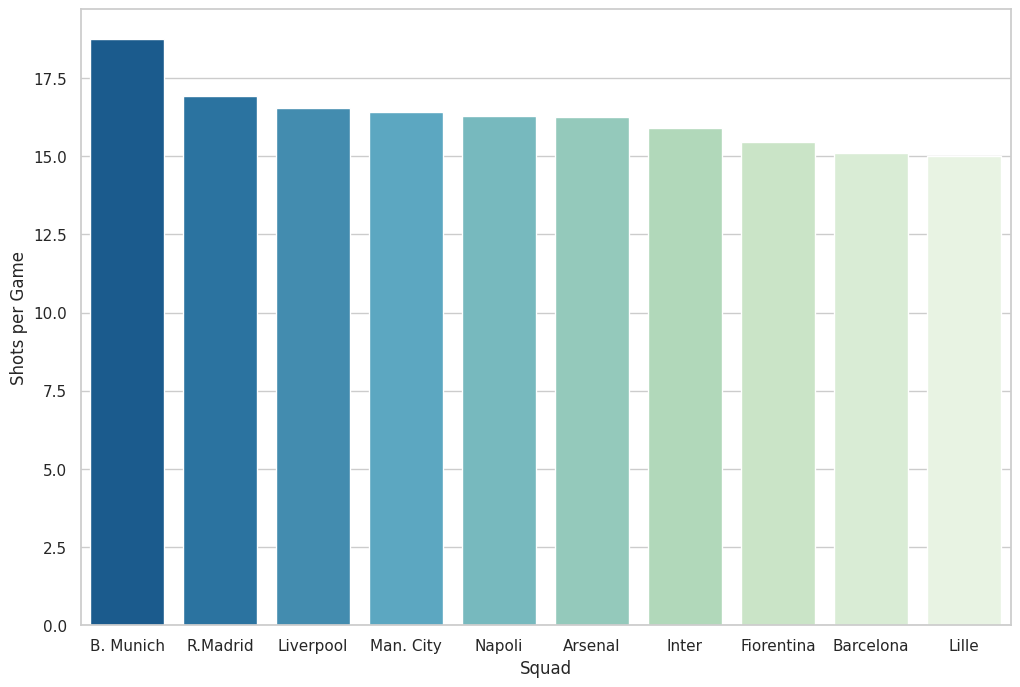

In [238]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=shooting.sort_values('Sh/90', ascending=False).head(10), x='Squad', y='Sh/90', palette='GnBu_r')
plt.xticks(rotation=0)
plt.xlabel('Squad')
plt.ylabel('Shots per Game')

plt.savefig('pics/shots.png')

In [129]:
# Let's see where Barcelona Ranks
sorted_df = shooting.sort_values('Sh/90', ascending=False).reset_index(drop=True)
barcelona_position = sorted_df[sorted_df['Squad'] == 'Barcelona'].index[0] + 1
print(f'Barcelona ranks: {barcelona_position}')

Barcelona ranks: 9


<AxesSubplot: xlabel='country', ylabel='Sh/90'>

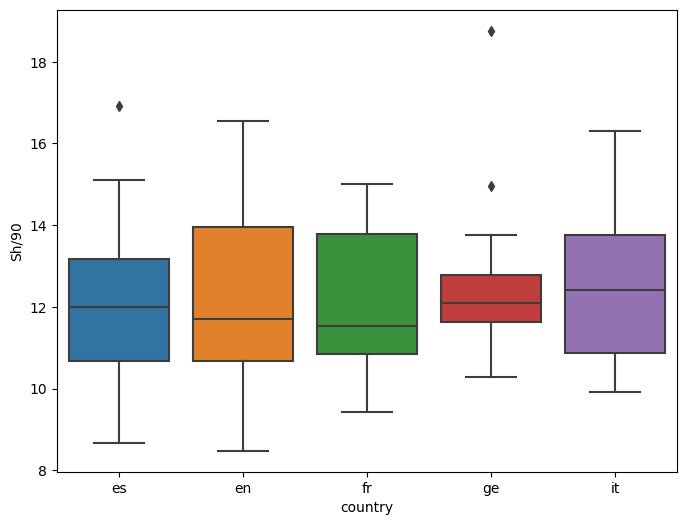

In [100]:
plt.figure(figsize=(8,6))
sns.boxplot(data=shooting, x='country', y='Sh/90')

##### __2.2.3 Shots on target per game__

<AxesSubplot: xlabel='Squad', ylabel='SoT/90'>

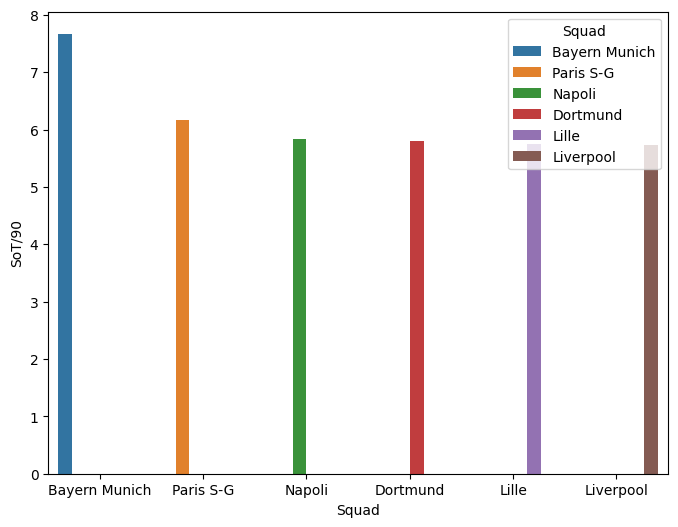

In [96]:
plt.figure(figsize=(8,6))
sns.barplot(data=shooting.sort_values('SoT/90', ascending=False).head(6), x='Squad', y='SoT/90', hue='Squad')

In [130]:
# Let's see where Barcelona Ranks
sorted_df = shooting.sort_values('SoT/90', ascending=False).reset_index(drop=True)
barcelona_position = sorted_df[sorted_df['Squad'] == 'Barcelona'].index[0] + 1
print(f'Barcelona ranks: {barcelona_position}')

Barcelona ranks: 9


<AxesSubplot: xlabel='country', ylabel='SoT/90'>

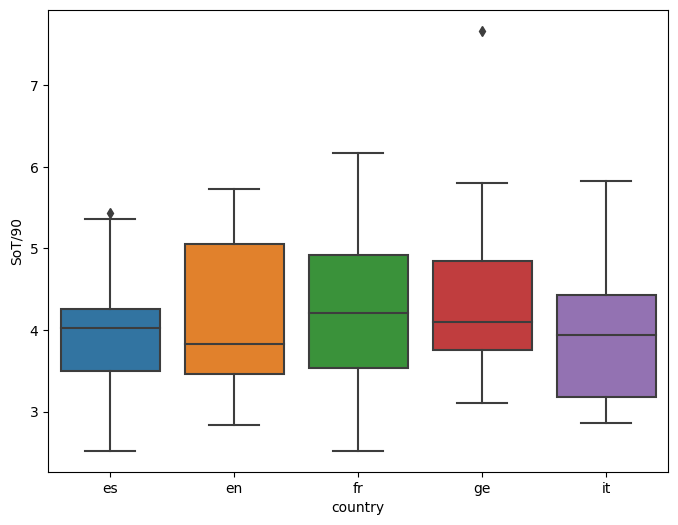

In [101]:
plt.figure(figsize=(8,6))
sns.boxplot(data=shooting, x='country', y='SoT/90')

##### __2.2.4 Total Goals__

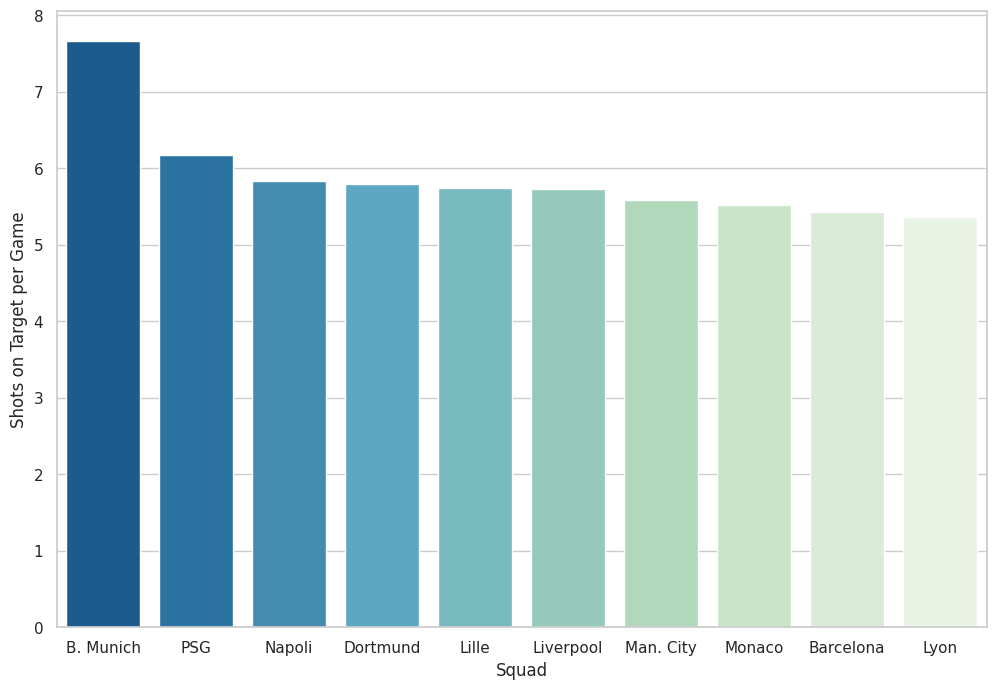

In [242]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=shooting.sort_values('SoT/90', ascending=False).head(10), x='Squad', y='SoT/90', palette='GnBu_r')
plt.xticks(rotation=0)
plt.xlabel('Squad')
plt.ylabel('Shots on Target per Game')

plt.savefig('pics/shotsOT.png')

In [131]:
# Let's see where Barcelona Ranks
sorted_df = shooting.sort_values('Gls', ascending=False).reset_index(drop=True)
barcelona_position = sorted_df[sorted_df['Squad'] == 'Barcelona'].index[0] + 1
print(f'Barcelona ranks: {barcelona_position}')

Barcelona ranks: 9


<AxesSubplot: xlabel='country', ylabel='Gls'>

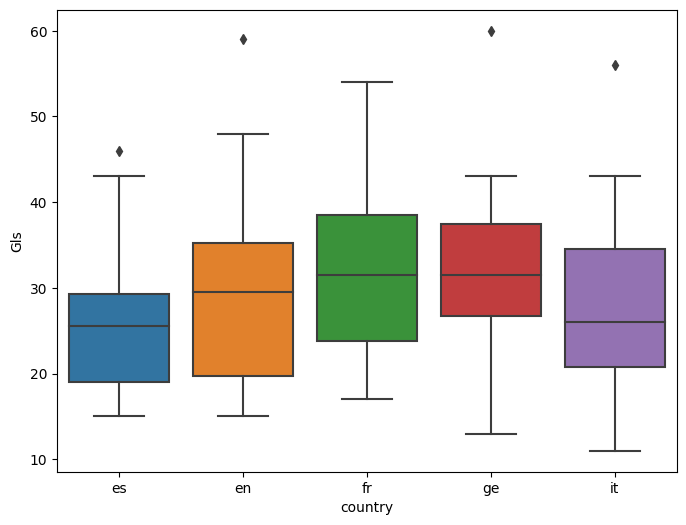

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(data=shooting, x='country', y='Gls')

### __3. Passing Data__

#### __3.1 Create 'passing' df with the data from the five big leagues__

In [152]:
passing = get_df(list_data, 10)

In [133]:
passing.sample(n=5)

,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,country
59,Troyes,29,23.0,7816,9836,79.5,137496,52112,3483,4012,...,19,19.4,16.7,-0.4,201,578,127,47,744,fr
80,Cremonese,31,22.0,6342,8861,71.6,115030,47540,2801,3361,...,7,13.7,13.6,-6.7,196,577,186,66,717,it
35,Nott'ham Forest,33,23.0,6339,8821,71.9,117866,46072,2607,3165,...,10,18.8,12.9,-8.8,159,432,113,40,542,en
33,Manchester Utd,25,23.0,9792,12229,80.1,163393,55678,4898,5533,...,28,26.5,23.9,1.5,256,732,217,39,894,en
20,Arsenal,25,23.0,10807,12999,83.1,185420,61568,4987,5528,...,34,31.4,27.2,2.6,279,966,270,38,1238,en


#### __3.2 Explore passing__

##### __3.2.1 Key Passes__

Passes that directly lead to a shot (assisted shots)

In [304]:
# Create new column with key passes per game
passing['KP/90'] = passing['KP'] / passing['# Pl']

In [305]:
# Rename Teams
passing['Squad'] = passing['Squad'].replace({'Bayern Munich': 'B. Munich',
                                             'Manchester City': 'Man. City',
                                             'Paris S-G': 'PSG',
                                             'Real Madrid': 'R.Madrid',
                                            'Manchester Utd': 'Man. Utd.',
                                            'Newcastle Utd': 'Newcastle'})

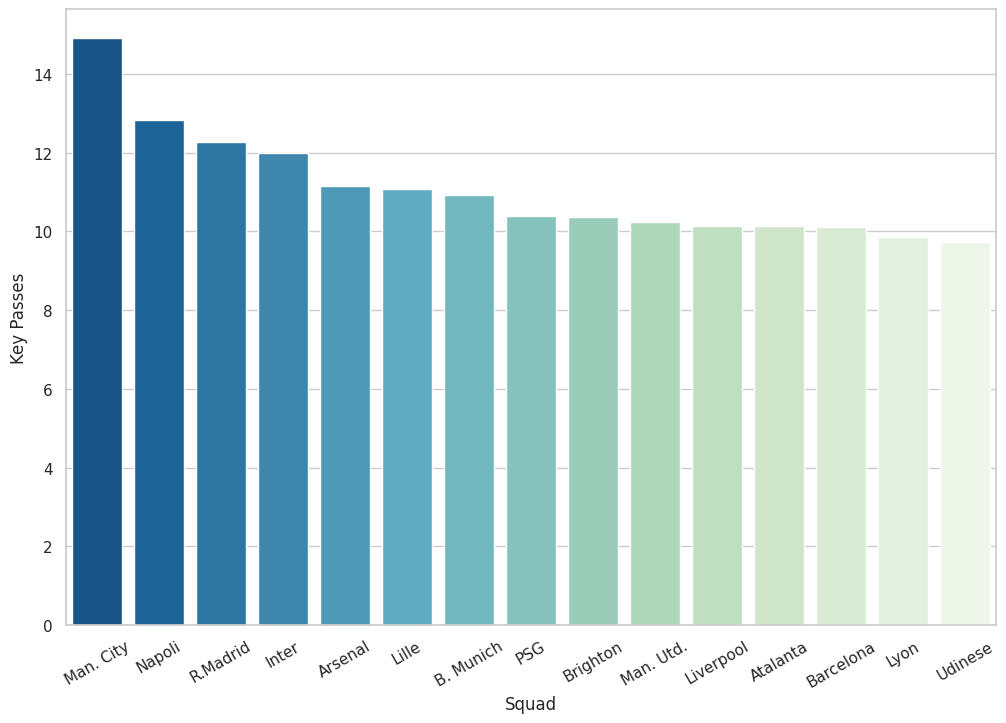

In [261]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=passing.sort_values('KP/90', ascending=False).head(15), x='Squad', y='KP/90', palette='GnBu_r')
plt.xticks(rotation=30)
plt.xlabel('Squad')
plt.ylabel('Key Passes')

plt.savefig('pics/KP.png')

In [161]:
# Let's see where barcelona ranks
sorted_df = passing.sort_values('KP', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 14


<AxesSubplot: xlabel='country', ylabel='KP'>

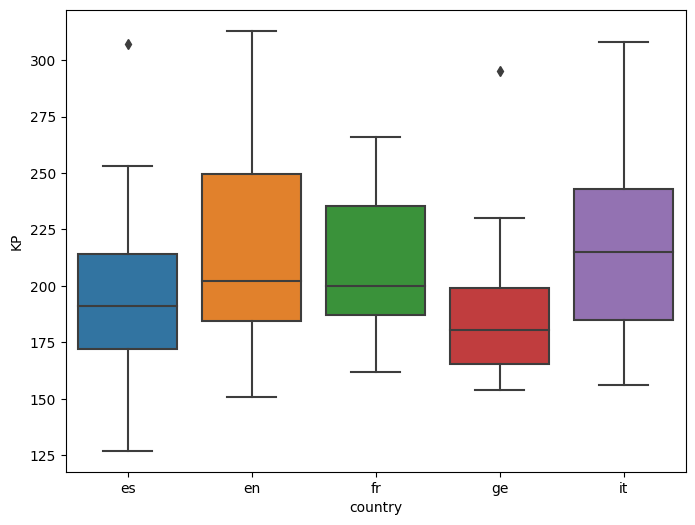

In [138]:
plt.figure(figsize=(8,6))
sns.boxplot(data=passing, x='country', y='KP')

##### __3.2.2 Passes into final third__

Completed Passes that enter the rivals 1/3

In [306]:
# Create new column with passes into rivals final third per game
passing['third/90'] = passing['1/3'] / passing['# Pl']

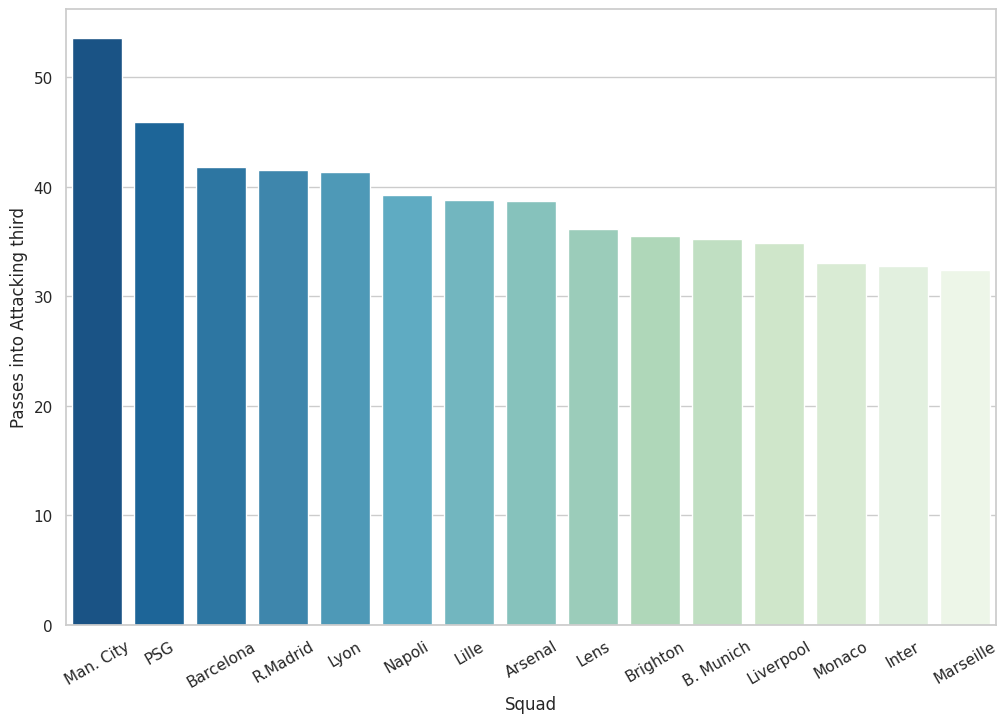

In [264]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=passing.sort_values('third/90', ascending=False).head(15), x='Squad', y='third/90', palette='GnBu_r')
plt.xticks(rotation=30)
plt.xlabel('Squad')
plt.ylabel('Passes into Attacking third')

plt.savefig('pics/third.png')

<AxesSubplot: xlabel='country', ylabel='1/3'>

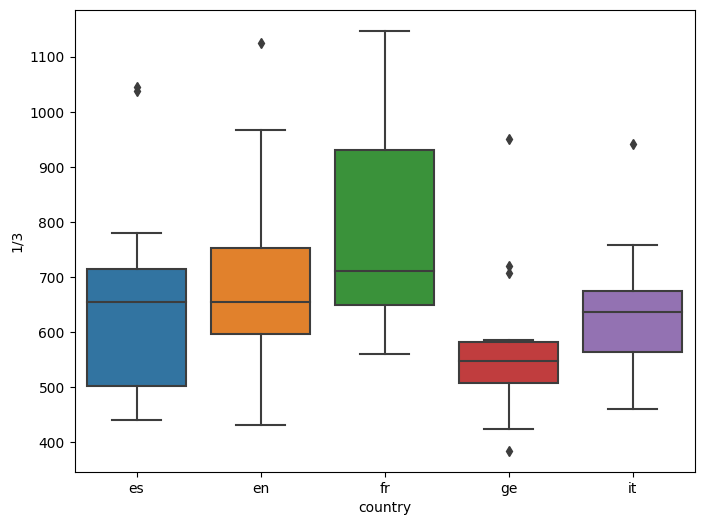

In [140]:
plt.figure(figsize=(8,6))
sns.boxplot(data=passing, x='country', y='1/3')

##### __3.2.3 Passes into pen Area__

Completed passes into the rivals big area (18 yard box)

<AxesSubplot: xlabel='Squad', ylabel='PPA'>

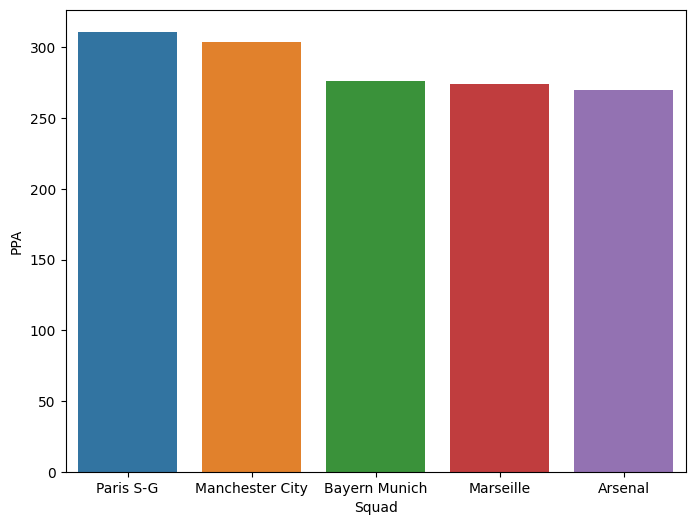

In [141]:
plt.figure(figsize=(8,6))
sns.barplot(data=passing.sort_values('PPA', ascending=False).head(5), x='Squad', y='PPA')

In [160]:
# Let's see where barcelona ranks
sorted_df = passing.sort_values('PPA', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 7


<AxesSubplot: xlabel='country', ylabel='PPA'>

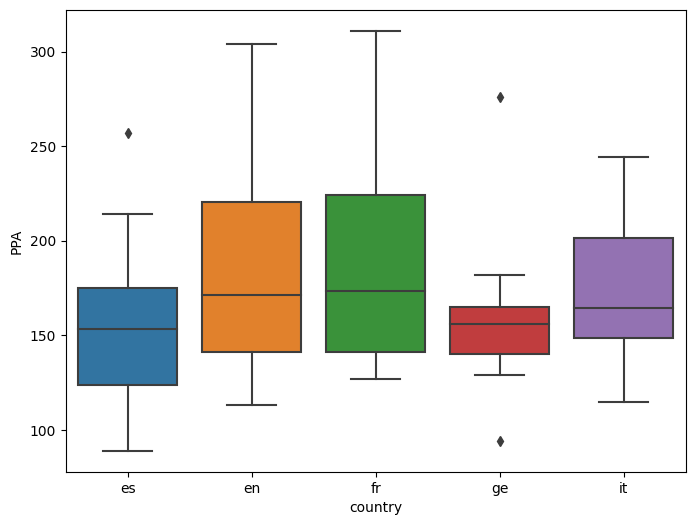

In [143]:
plt.figure(figsize=(8,6))
sns.boxplot(data=passing, x='country', y='PPA')

##### __3.2.4 Crosses into pen Area__

Completed crosses into the rivals big area (18 yard box)

In [307]:
# Create new column with crosses into pen area per game
passing['CrsPA/90'] = passing['CrsPA'] / passing['# Pl']

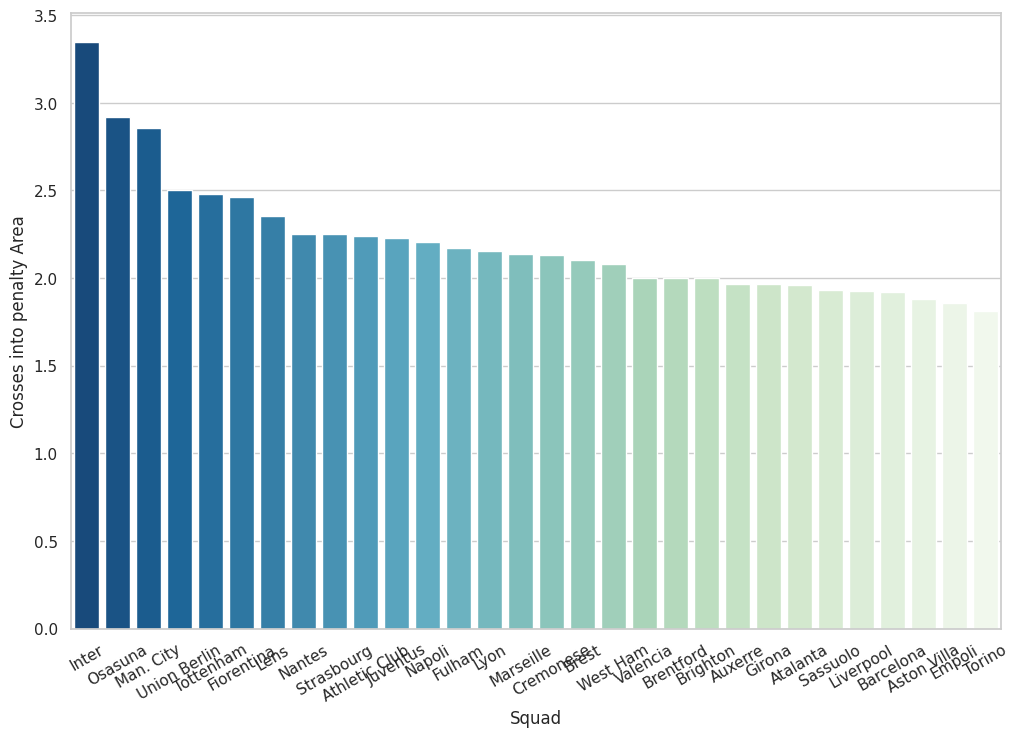

In [272]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=passing.sort_values('CrsPA/90', ascending=False).head(30), x='Squad', y='CrsPA/90', palette='GnBu_r')
plt.xticks(rotation=30)
plt.xlabel('Squad')
plt.ylabel('Crosses into penalty Area')

plt.savefig('pics/crspa.png')

In [159]:
# Let's see where barcelona ranks
sorted_df = passing.sort_values('CrsPA', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 41


<AxesSubplot: xlabel='country', ylabel='CrsPA'>

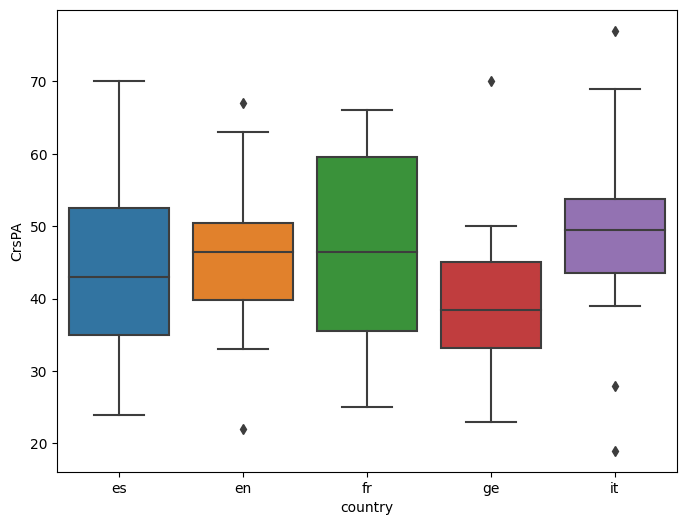

In [146]:
plt.figure(figsize=(8,6))
sns.boxplot(data=passing, x='country', y='CrsPA')

##### __3.2.4 Progressive Passes__

Completed passes that move the ball at least 10yds towards the rivals goal line or any pass into the pen area

<AxesSubplot: xlabel='Squad', ylabel='PrgP'>

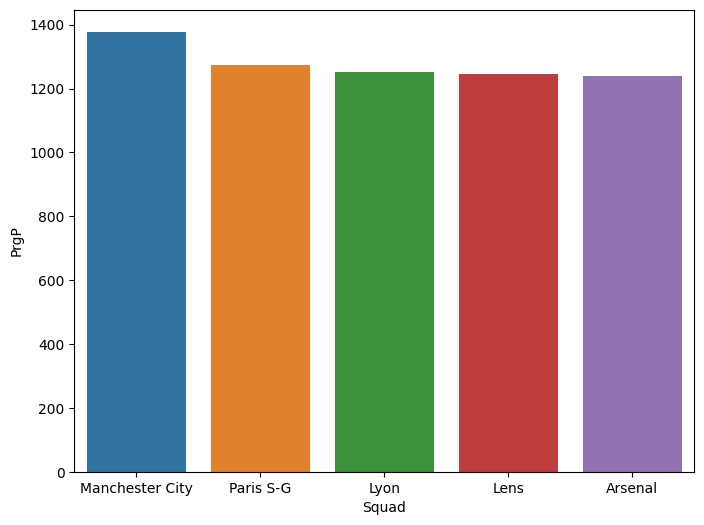

In [147]:
plt.figure(figsize=(8,6))
sns.barplot(data=passing.sort_values('PrgP', ascending=False).head(5), x='Squad', y='PrgP')

In [158]:
# Let's see where barcelona ranks
sorted_df = passing.sort_values('PrgP', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 8


<AxesSubplot: xlabel='country', ylabel='PrgP'>

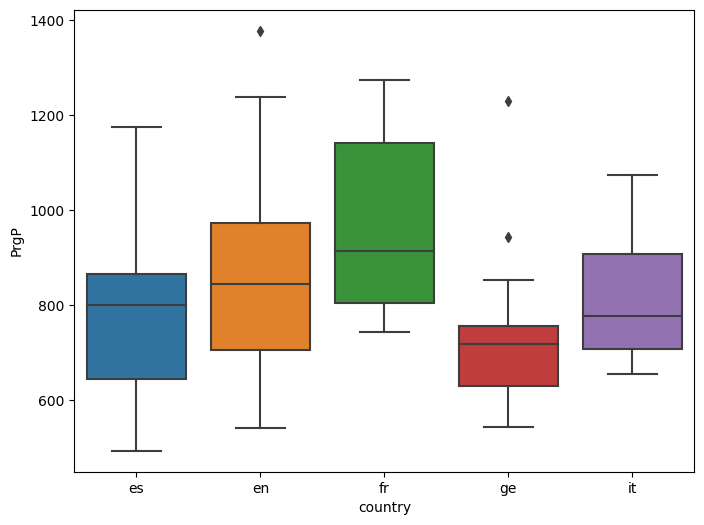

In [149]:
plt.figure(figsize=(8,6))
sns.boxplot(data=passing, x='country', y='PrgP')

### __4. Possession Data__

#### __4.1 Create 'possession' df with the data from the five big leagues__

In [151]:
possession = get_df(list_data, 18)

In [154]:
possession.sample(n=5)

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,...,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR,country
6,Crystal Palace,23,44.7,23.0,13100,1692,4805,5583,2852,419,...,34704,17148,312,241,119,394,295,7964,712,en
12,Napoli,24,61.5,23.0,17020,1308,4536,8289,4337,684,...,51426,26809,526,366,147,355,220,12376,1065,it
9,Getafe,25,40.9,21.0,10342,1122,3415,4970,2056,293,...,24914,12111,203,164,43,257,145,5932,542,es
0,Arsenal,25,58.6,23.0,15452,1189,3940,6889,4734,797,...,49924,26102,513,339,178,337,242,10700,1221,en
8,Fulham,29,46.3,24.0,13480,1573,4509,5841,3283,479,...,40380,21621,413,309,89,356,239,8172,777,en


#### __4.2  Explore df__

##### __4.2.0 Total Possession__

<AxesSubplot: xlabel='Squad', ylabel='Poss'>

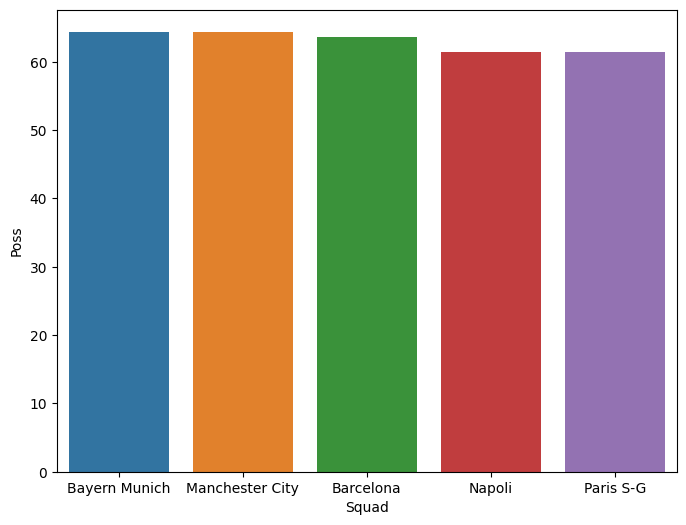

In [163]:
plt.figure(figsize=(8,6))
sns.barplot(data=possession.sort_values('Poss', ascending=False).head(5), x='Squad', y='Poss')

##### __4.2.1 Touches in offensive third__

<AxesSubplot: xlabel='Squad', ylabel='Att 3rd'>

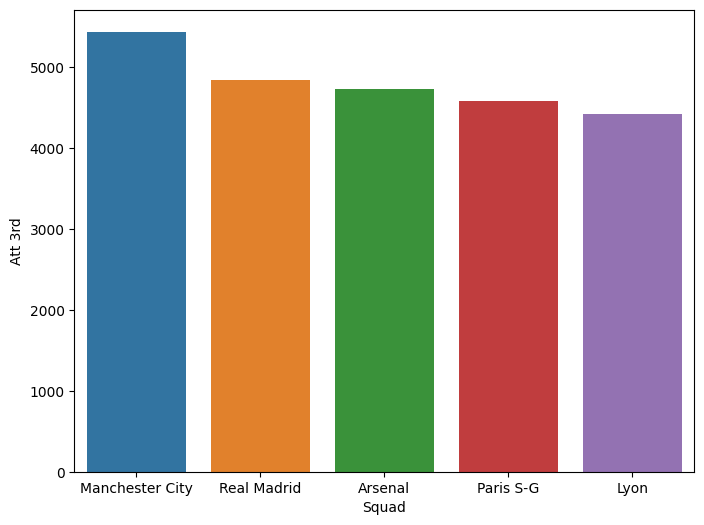

In [155]:
plt.figure(figsize=(8,6))
sns.barplot(data=possession.sort_values('Att 3rd', ascending=False).head(5), x='Squad', y='Att 3rd')

In [157]:
# Let's see where barcelona ranks
sorted_df = possession.sort_values('Att 3rd', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 6


<AxesSubplot: xlabel='country', ylabel='Att 3rd'>

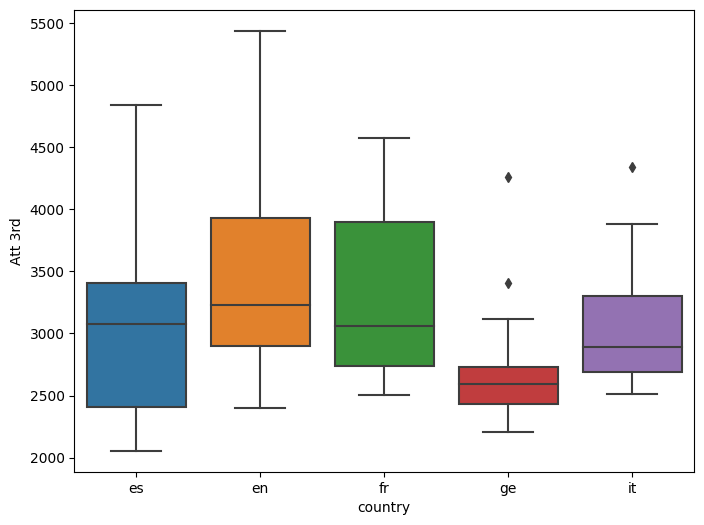

In [162]:
plt.figure(figsize=(8,6))
sns.boxplot(data=possession, x='country', y='Att 3rd')

##### __4.2.2 Touches in Mid third__

<AxesSubplot: xlabel='Squad', ylabel='Mid 3rd'>

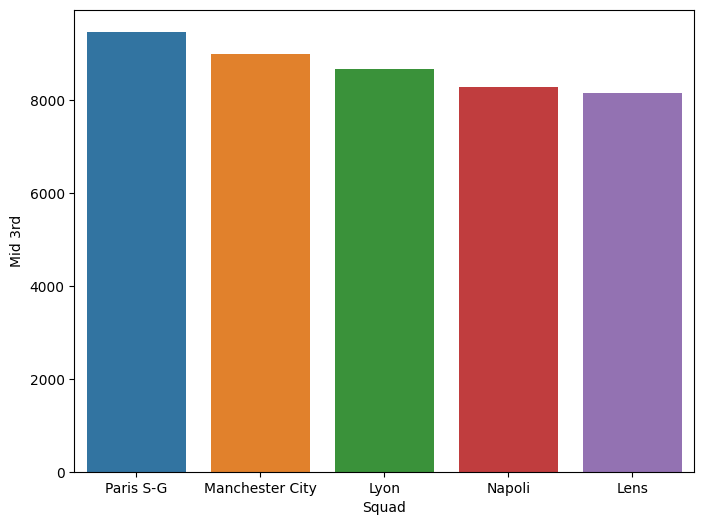

In [187]:
plt.figure(figsize=(8,6))
sns.barplot(data=possession.sort_values('Mid 3rd', ascending=False).head(5), x='Squad', y='Mid 3rd')

In [188]:
# Let's see where barcelona ranks
sorted_df = possession.sort_values('Mid 3rd', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 7


##### __4.2.3 Touches in rival pen Area__

<AxesSubplot: xlabel='Squad', ylabel='Att Pen'>

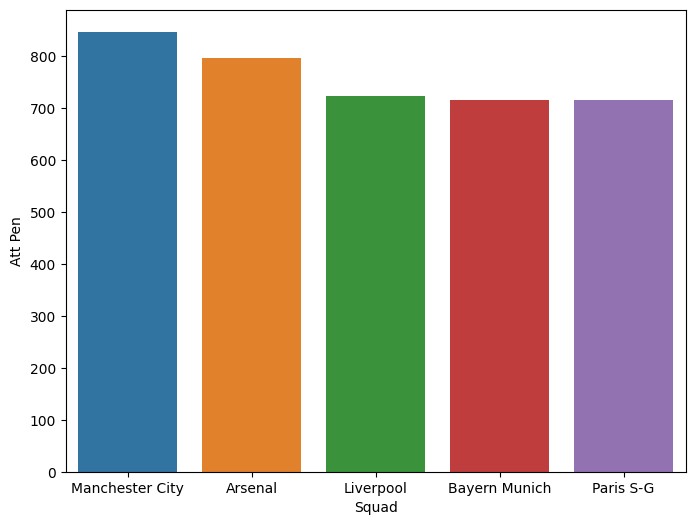

In [164]:
plt.figure(figsize=(8,6))
sns.barplot(data=possession.sort_values('Att Pen', ascending=False).head(5), x='Squad', y='Att Pen')

In [165]:
# Let's see where barcelona ranks
sorted_df = possession.sort_values('Att Pen', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 8


<AxesSubplot: xlabel='country', ylabel='Att Pen'>

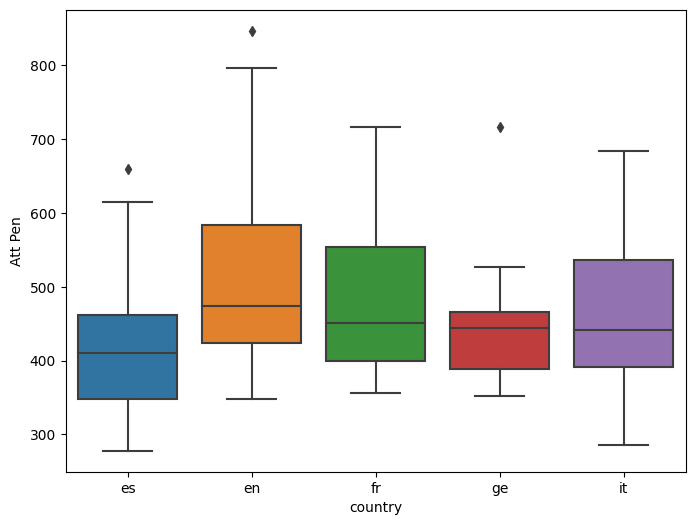

In [166]:
plt.figure(figsize=(8,6))
sns.boxplot(data=possession, x='country', y='Att Pen')

##### __4.2.4 Carries into final third__

In [308]:
# Create columns for carries into final third per game
possession['third/90'] = possession['1/3'] / possession['# Pl']

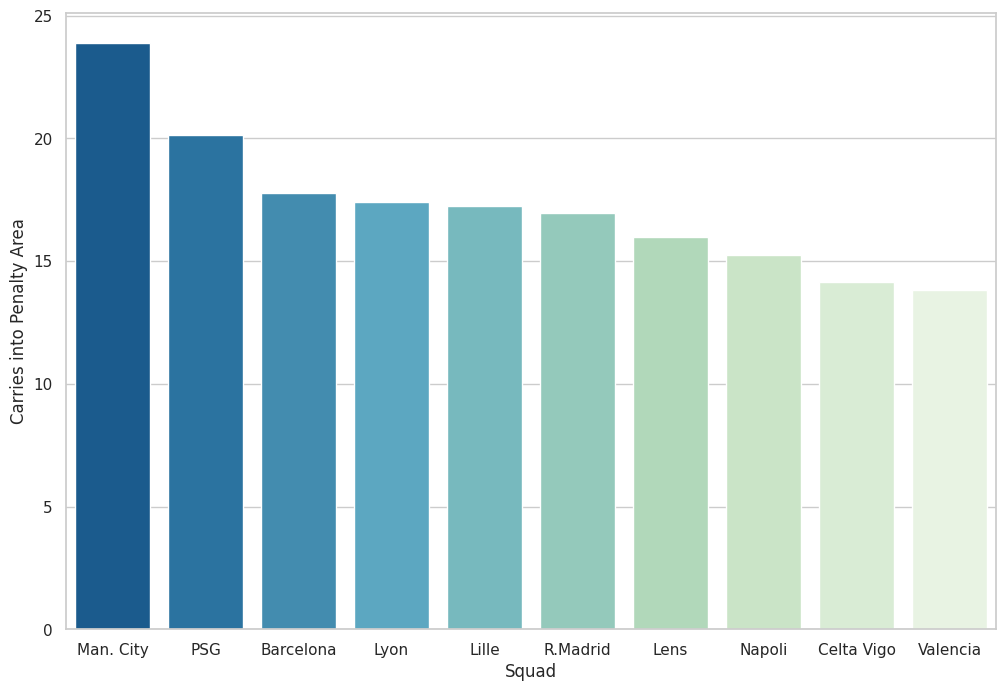

In [309]:
possession['Squad'] = possession['Squad'].replace({'Bayern Munich': 'B. Munich',
                                               'Manchester City': 'Man. City',
                                               'Paris S-G': 'PSG',
                                               'Real Madrid': 'R.Madrid'})

sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=possession.sort_values('third/90', ascending=False).head(10), x='Squad', y='third/90', palette='GnBu_r')
plt.xticks(rotation=0)
plt.xlabel('Squad')
plt.ylabel('Carries into Penalty Area')

plt.savefig('pics/carries.png')

<AxesSubplot: xlabel='country', ylabel='1/3'>

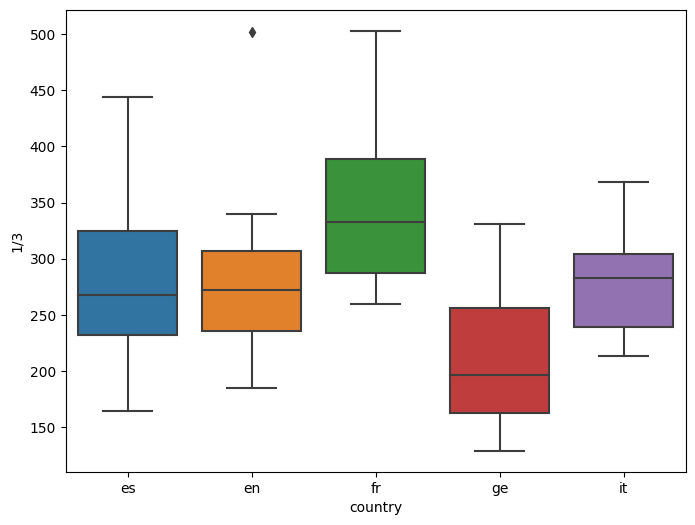

In [168]:
plt.figure(figsize=(8,6))
sns.boxplot(data=possession, x='country', y='1/3')

##### __4.3.4 Carries into pen Area__

In [310]:
# Create new column with carries into pen area per game
possession['CPA/90'] = possession['CPA'] / possession['# Pl']

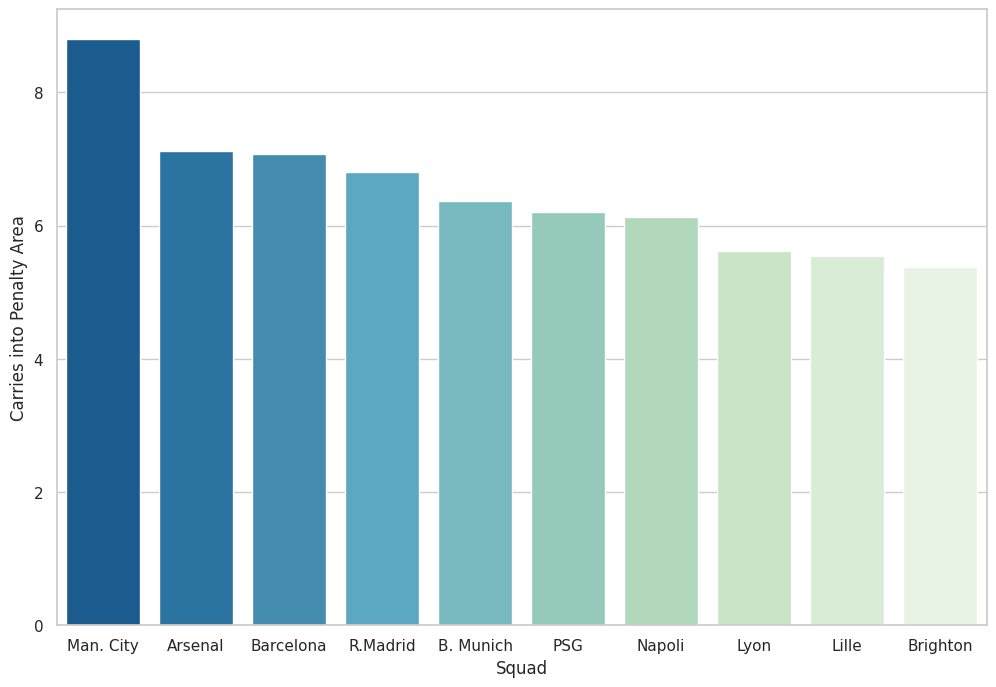

In [278]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=possession.sort_values('CPA/90', ascending=False).head(10), x='Squad', y='CPA/90', palette='GnBu_r')
plt.xticks(rotation=0)
plt.xlabel('Squad')
plt.ylabel('Carries into Penalty Area')

plt.savefig('pics/carries.png')

<AxesSubplot: xlabel='country', ylabel='CPA'>

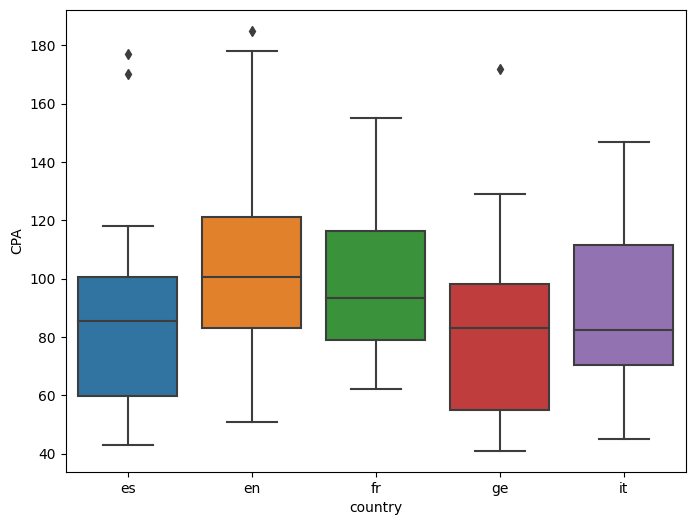

In [170]:
plt.figure(figsize=(8,6))
sns.boxplot(data=possession, x='country', y='CPA')

##### __4.3.5 Takeons Attempted__

In [311]:
# Create new column with takeons attempted per game
possession['Att/90'] = possession['Att'] / possession['# Pl']

In [312]:
# Rename teams
possession['Squad'] = possession['Squad'].replace({'Crystal Palace': 'Cr. Palace',
                                                   'Eint Frankfurt': 'Frankfurt',
                                                   'Newcastle Utd': 'Newcastle',
                                                   'Clermont Foot': 'Clermont'})

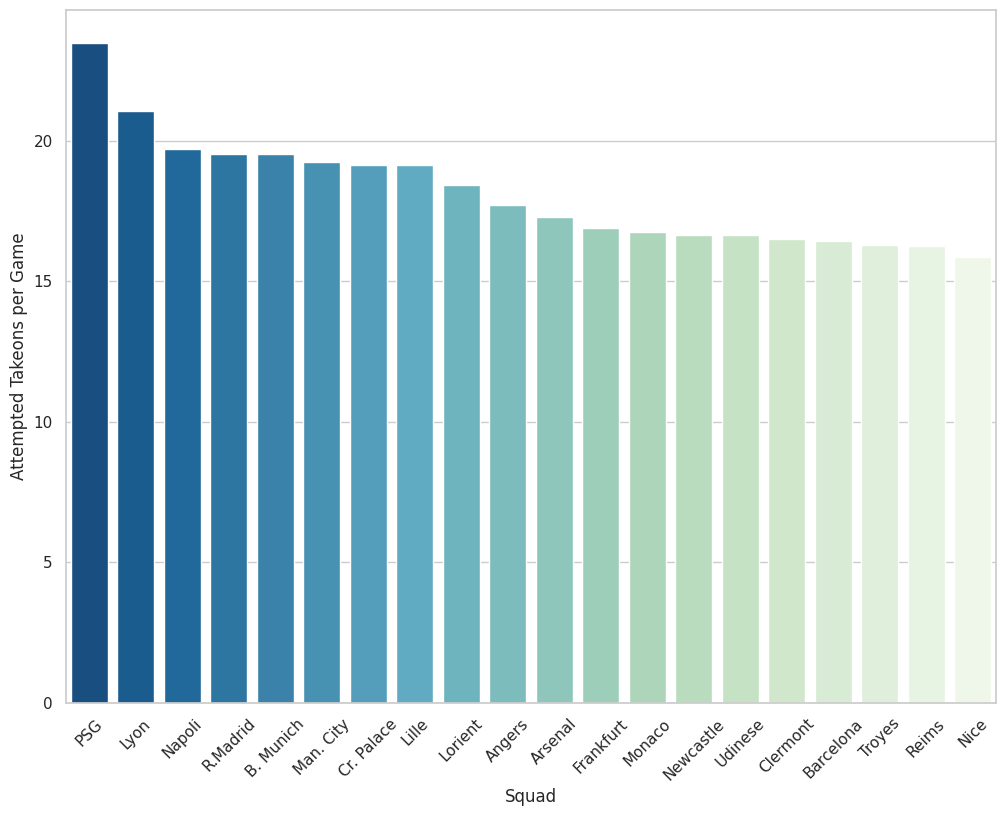

In [294]:
sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,9))
sns.barplot(data=possession.sort_values('Att/90', ascending=False).head(20), x='Squad', y='Att/90', palette='GnBu_r')
plt.xticks(rotation=45)
plt.xlabel('Squad')
plt.ylabel('Attempted Takeons per Game')

plt.savefig('pics/takeons.png')

In [291]:
# Let's see where barcelona ranks
sorted_df = possession.sort_values('Att/90', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 17


<AxesSubplot: xlabel='country', ylabel='Att'>

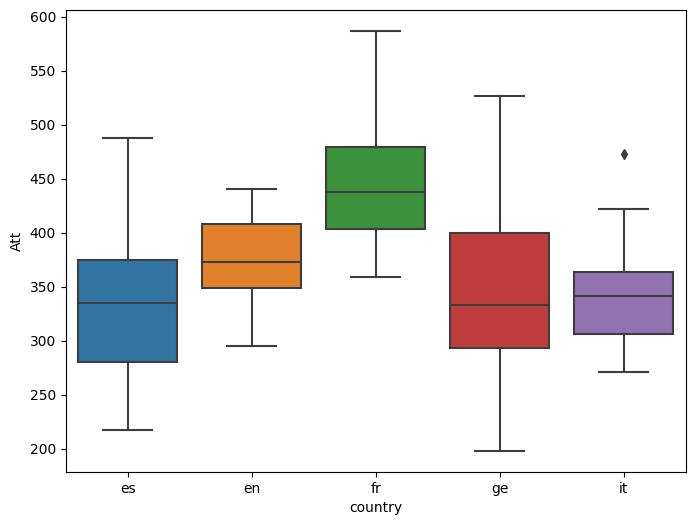

In [191]:
plt.figure(figsize=(8,6))
sns.boxplot(data=possession, x='country', y='Att')

### __5. Squad Goal and Shot Creation__

#### __5.1 Create 'sca' df with the data from the five big leagues__

In [171]:
sca = get_df(list_data, 14)

In [172]:
sca.sample(n=5)

,Squad,# Pl,90s,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,country
17,Strasbourg,28,24.0,439,18.29,322,36,16,28,24,13,40,1.67,27,0,1,7,3,2,fr
5,Freiburg,23,21.0,446,21.24,313,50,17,34,26,6,58,2.76,37,6,1,7,7,0,ge
13,Manchester Utd,25,23.0,564,24.52,459,27,19,37,15,7,66,2.87,55,2,5,2,2,0,en
14,Salernitana,28,22.0,395,17.95,301,32,12,24,21,5,42,1.91,37,1,2,2,0,0,it
0,Augsburg,33,21.0,377,17.95,241,59,15,26,25,11,46,2.19,26,6,2,6,4,2,ge


#### __5.2 Explore sca__

##### __5.2.1 Shot Creating Actions__

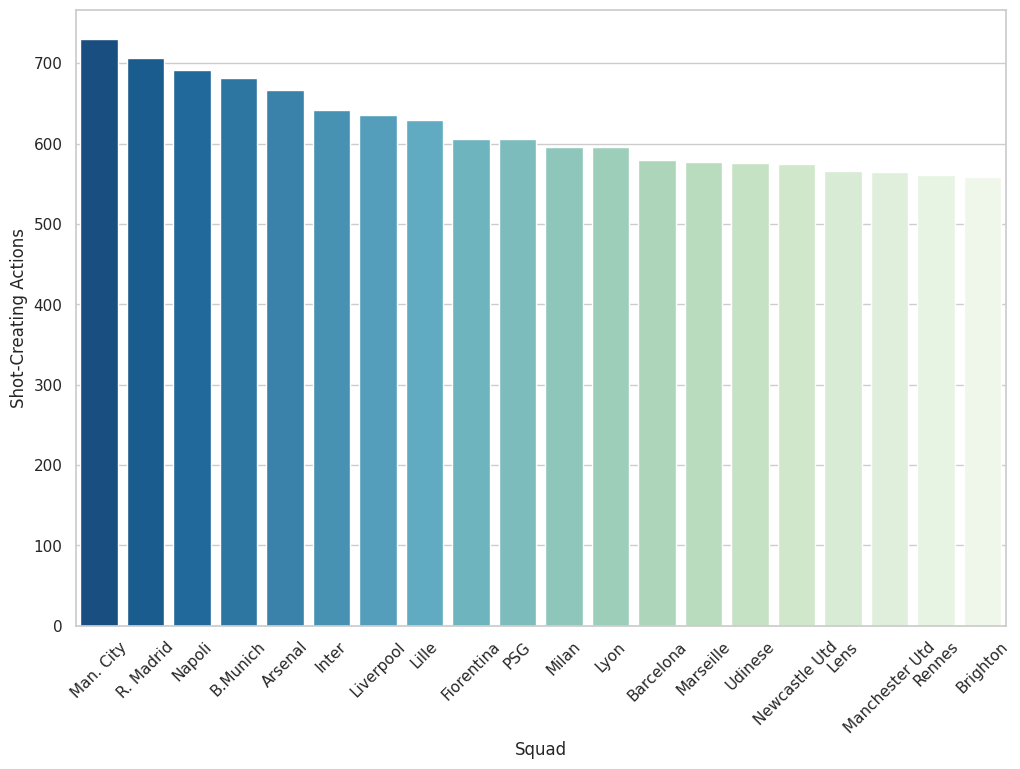

In [249]:
sca['Squad'] = sca['Squad'].replace({'Manchester City': 'Man. City',
                                    'Real Madrid': 'R. Madrid',
                                    'Bayern Munich': 'B.Munich',
                                    'Paris S-G': 'PSG'})

sns.set_theme(style='whitegrid', palette='crest')
plt.figure(figsize=(12,8))
sns.barplot(data=sca.sort_values('SCA', ascending=False).head(20), x='Squad', y='SCA', palette='GnBu_r')
plt.xticks(rotation=45)
plt.xlabel('Squad')
plt.ylabel('Shot-Creating Actions')

plt.savefig('pics/SCA.png')

In [175]:
# Let's see where barcelona ranks
sorted_df = sca.sort_values('SCA', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 13


<AxesSubplot: xlabel='country', ylabel='SCA'>

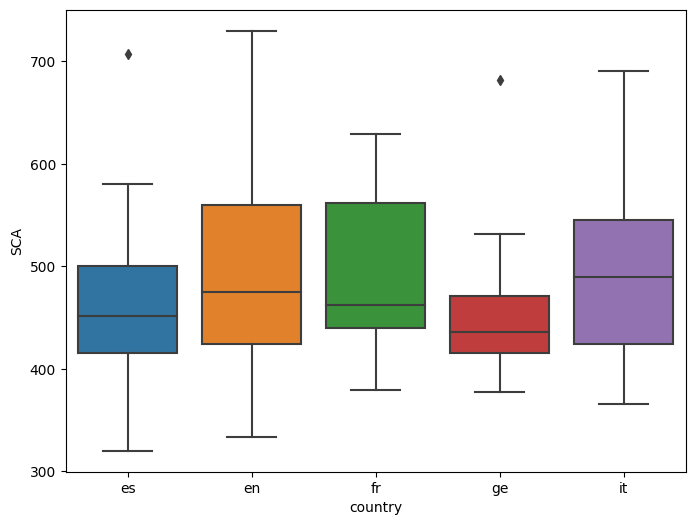

In [176]:
plt.figure(figsize=(8,6))
sns.boxplot(data=sca, x='country', y='SCA')

##### __5.2.2 Shot Creating Actions per Game__

<AxesSubplot: xlabel='Squad', ylabel='SCA90'>

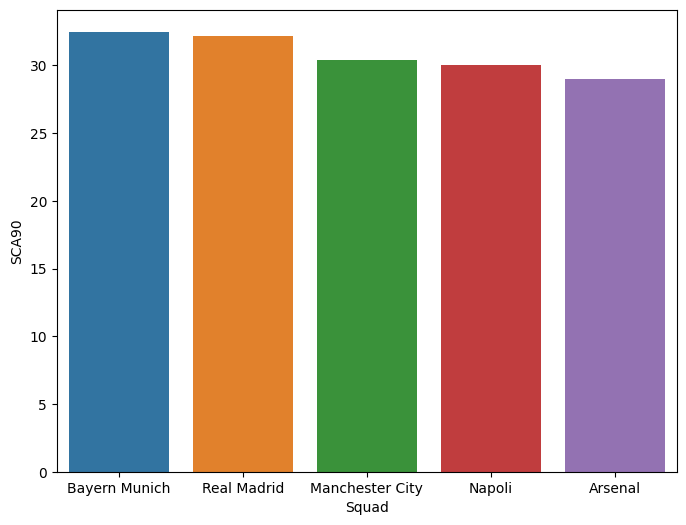

In [177]:
plt.figure(figsize=(8,6))
sns.barplot(data=sca.sort_values('SCA90', ascending=False).head(5), x='Squad', y='SCA90')

In [178]:
# Let's see where barcelona ranks
sorted_df = sca.sort_values('SCA90', ascending=False).reset_index(drop=True)

barcelona_index = sorted_df.loc[sorted_df['Squad'] == 'Barcelona'].index[0]

print(f'Barcelona ranks: {barcelona_index + 1}')

Barcelona ranks: 8


<AxesSubplot: xlabel='country', ylabel='SCA90'>

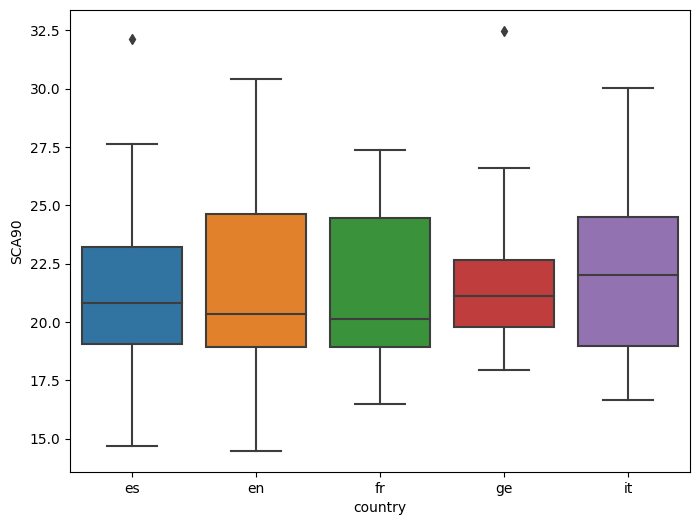

In [179]:
plt.figure(figsize=(8,6))
sns.boxplot(data=sca, x='country', y='SCA90')